<a href="https://colab.research.google.com/github/RahulRajeev88/-ML-Projects/blob/master/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STROKE PREDICTION DATASET**

# **Importing Required Libraries for Execution**

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay,mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier


In [89]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# **Data Analysation**

In [90]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [92]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

# **Visual Analysation In Data**

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

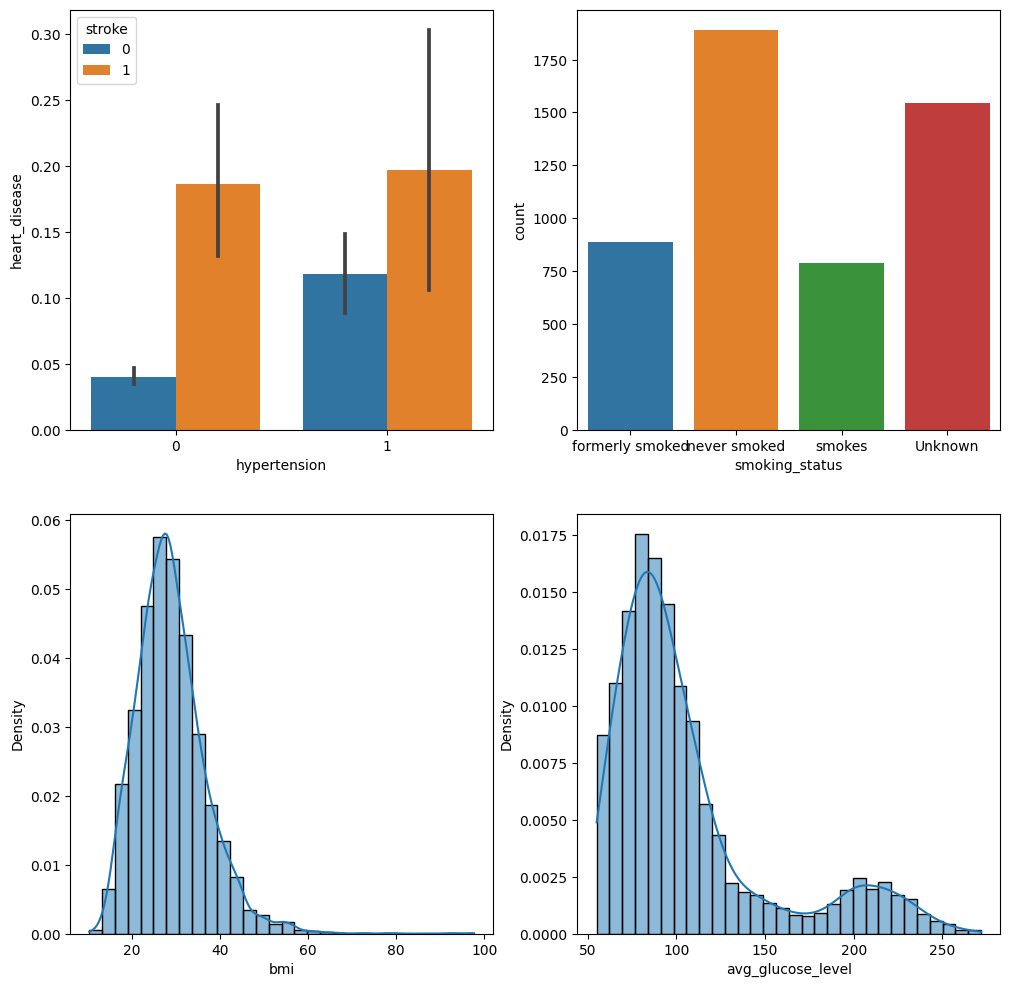

In [93]:
fig,axis=plt.subplots(2,2,figsize=(12,12))
sns.barplot(df,x='hypertension',y='heart_disease',hue='stroke',ax=axis[0,0])
sns.countplot(df,x='smoking_status',ax=axis[0,1])
sns.histplot(x='bmi',data=df,bins=30,kde=True,stat='density',linewidth=1,ax=axis[1,0])
sns.histplot(x='avg_glucose_level',data=df,bins=30,kde=True,stat='density',linewidth=1,ax=axis[1,1])

# **Data Cleaning and Data Processing**

In [94]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [95]:
df['bmi']=df['bmi'].fillna(df['bmi'].mode()[0])

In [96]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [97]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [98]:
label_enc=LabelEncoder()
df['smoking_status']=label_enc.fit_transform(df['smoking_status'])

In [99]:
df['gender']=label_enc.fit_transform(df['gender'])

In [100]:
df.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [101]:
df.shape

(5110, 12)

In [102]:
df=df.drop(['id','ever_married','work_type','Residence_type'],axis=1)
df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.6,1,1
1,0,61.0,0,0,202.21,28.7,2,1
2,1,80.0,0,1,105.92,32.5,2,1
3,0,49.0,0,0,171.23,34.4,3,1
4,0,79.0,1,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,83.75,28.7,2,0
5106,0,81.0,0,0,125.20,40.0,2,0
5107,0,35.0,0,0,82.99,30.6,2,0
5108,1,51.0,0,0,166.29,25.6,1,0


In [103]:
stroke_count=df['stroke'].value_counts()

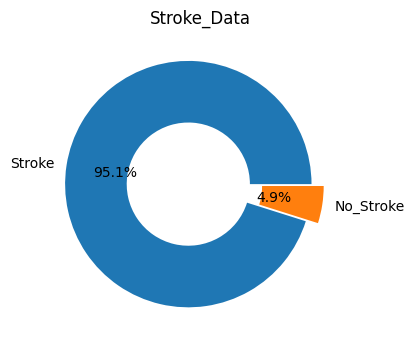

In [104]:
value=['Stroke','No_Stroke']
plt.figure(figsize=(4,4))
plt.pie(stroke_count,explode=[0.1,0],labels=value,autopct='%2.1f%%',wedgeprops={'width':0.5})
plt.title('Stroke_Data')
plt.show()

# **Sepaerating Dataset For Model Creation**

In [105]:
X=df.iloc[:,:-1].values
X

array([[  1.  ,  67.  ,   0.  , ..., 228.69,  36.6 ,   1.  ],
       [  0.  ,  61.  ,   0.  , ..., 202.21,  28.7 ,   2.  ],
       [  1.  ,  80.  ,   0.  , ..., 105.92,  32.5 ,   2.  ],
       ...,
       [  0.  ,  35.  ,   0.  , ...,  82.99,  30.6 ,   2.  ],
       [  1.  ,  51.  ,   0.  , ..., 166.29,  25.6 ,   1.  ],
       [  0.  ,  44.  ,   0.  , ...,  85.28,  26.2 ,   0.  ]])

In [106]:
y=df.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

# **Feature Scaling**

In [107]:
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[ 1.18807255,  1.05143428, -0.32860186, ...,  2.70637544,
         1.00220956, -0.35178071],
       [-0.840344  ,  0.78607007, -0.32860186, ...,  2.12155854,
        -0.02411685,  0.58155233],
       [ 1.18807255,  1.62639008, -0.32860186, ..., -0.0050283 ,
         0.46955914,  0.58155233],
       ...,
       [-0.840344  , -0.36384151, -0.32860186, ..., -0.51144264,
         0.22272115,  0.58155233],
       [ 1.18807255,  0.34379639, -0.32860186, ...,  1.32825706,
        -0.42685253, -0.35178071],
       [-0.840344  ,  0.03420481, -0.32860186, ..., -0.46086746,
        -0.34890369, -1.28511375]])

# **Handling ImBalanced Dataset By Using SMOTEENN**

In [108]:
from imblearn.combine import SMOTEENN
os=SMOTEENN()
X_os,y_os=os.fit_resample(X,y)
X_os,y_os


(array([[ 1.18807255, -1.77911731, -0.32860186, ..., -0.24354879,
         -1.41420453, -1.28511375],
        [ 1.18807255,  0.65338797,  3.04319637, ..., -0.40167904,
          1.33998787,  0.58155233],
        [-0.840344  , -1.55798046, -0.32860186, ...,  0.10473529,
         -1.46617042, -1.28511375],
        ...,
        [-0.840344  ,  1.14858248, -0.32860186, ..., -0.26482973,
         -0.78933697,  0.58155233],
        [ 1.18807255,  0.3084982 , -0.32860186, ..., -0.38769156,
          1.24270271, -0.62345637],
        [ 1.18807255,  0.88631504, -0.32860186, ..., -0.55072882,
         -0.02188692,  1.51488536]]),
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 8179    1
 8180    1
 8181    1
 8182    1
 8183    1
 Name: stroke, Length: 8184, dtype: int64)

1    4333
0    3851
Name: stroke, dtype: int64


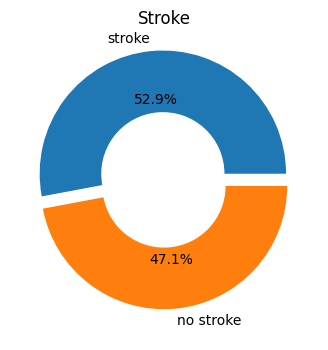

In [109]:
count=y_os.value_counts()
print(count)
new=['stroke','no stroke']
plt.figure(figsize=(4,4))
plt.pie(count,explode=[0.1,0],labels=new,autopct='%2.1f%%',wedgeprops={'width':0.5})
plt.title('Stroke')
plt.show()

In [110]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


# **Model Creation**


*   **KNN**
*   **SVM**
*   **Naive Bayes**
*   **Random Forest**
*   **DecisionTree**





In [111]:
GaussianNB,
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC(kernel='linear')
nb=GaussianNB()
rfc=RandomForestClassifier(n_estimators=15,criterion='entropy')
dt=DecisionTreeClassifier(criterion='entropy')
lst=[knn,svm,nb,rfc,dt]
score=[]
for model in lst:
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('Accuracy score of',model,':')
  model_score=accuracy_score(y_test,y_pred)*100
  print(model_score)
  score.append(model_score)
  print('*************************************')

Accuracy score of KNeighborsClassifier() :
93.73776908023484
*************************************
Accuracy score of SVC(kernel='linear') :
93.9334637964775
*************************************
Accuracy score of GaussianNB() :
87.573385518591
*************************************
Accuracy score of RandomForestClassifier(criterion='entropy', n_estimators=15) :
93.15068493150685
*************************************
Accuracy score of DecisionTreeClassifier(criterion='entropy') :
90.90019569471625
*************************************


# **Creation of Stacking model**

93.9334637964775
Classification Report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix Display: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7a37b7106410>


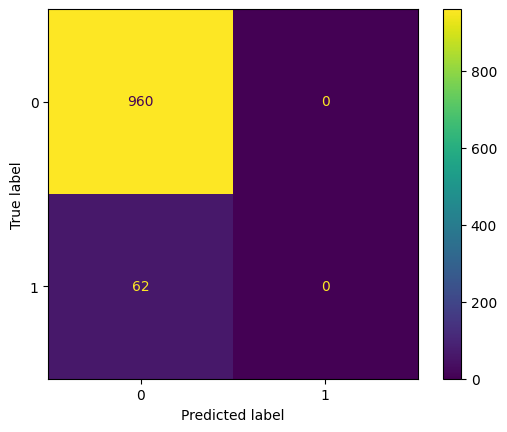

In [112]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
alg=[('knn',knn),('svm',svm),('nb',nb),('rfc',rfc),('dt',dt)]
lr=LogisticRegression(random_state=42)
sc=StackingClassifier(estimators=alg,final_estimator=lr,cv=5)
sc.fit(X_train,y_train)
y_pred1=sc.predict(X_test)
y_pred1
sc_score=accuracy_score(y_test,y_pred1)*100
print(sc_score)
score.append(sc_score)
print('Classification Report:',classification_report(y_test,y_pred1))
print('Confusion Matrix Display:',ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))

# **Comparing Accuracy**

In [114]:
Algorithm=['knn','svm','Naive','Random Forest','Decision Tree','Stacking']
Accuracy=score
Data=pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy},index=[1,2,3,4,5,6])
Data.style\
.highlight_max(subset='Accuracy',color='lightgreen')\
.highlight_min(subset='Accuracy',color='red')

,Algorithm,Accuracy
1,knn,93.737769
2,svm,93.933464
3,Naive,87.573386
4,Random Forest,93.150685
5,Decision Tree,90.900196
6,Stacking,93.933464
